In [1]:
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
from xml.etree import ElementTree as et # parse information from XML
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

In [2]:
# step-1: get path of each xml file, load all xml files and store in a list
xmlfiles = glob('1_datapreparation/data_images/*.xml')
# replace \\ with /
replace_text = lambda x: x.replace('\\','/')
xmlfiles = list(map(replace_text,xmlfiles))
xmlfiles

['1_datapreparation/data_images/000001.xml',
 '1_datapreparation/data_images/000002.xml',
 '1_datapreparation/data_images/000007.xml',
 '1_datapreparation/data_images/000009.xml',
 '1_datapreparation/data_images/000012.xml',
 '1_datapreparation/data_images/000016.xml',
 '1_datapreparation/data_images/000017.xml',
 '1_datapreparation/data_images/000019.xml',
 '1_datapreparation/data_images/000020.xml',
 '1_datapreparation/data_images/000021.xml',
 '1_datapreparation/data_images/000023.xml',
 '1_datapreparation/data_images/000024.xml',
 '1_datapreparation/data_images/000026.xml',
 '1_datapreparation/data_images/000030.xml',
 '1_datapreparation/data_images/000032.xml',
 '1_datapreparation/data_images/000033.xml',
 '1_datapreparation/data_images/000034.xml',
 '1_datapreparation/data_images/000035.xml',
 '1_datapreparation/data_images/000036.xml',
 '1_datapreparation/data_images/000039.xml',
 '1_datapreparation/data_images/000041.xml',
 '1_datapreparation/data_images/000042.xml',
 '1_datapr

In [3]:
tree = et.parse('1_datapreparation/data_images/000001.xml')
root = tree.getroot() # to get the annotation element root
image_name = root.find('filename').text
width = root.find('size').find('width').text
height = root.find('size').find('height').text
image_name, width, height

('000001.jpg', '1024', '657')

In [4]:
# step-2: read xml files
# from each xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # extract filename
    image_name = root.find('filename').text
    # width and height of the image
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    objs = root.findall('object')
    parser = []
    for obj in objs:
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        xmax = bndbox.find('xmax').text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser.append([image_name, width, height, name,xmin,xmax,ymin,ymax])
        
    return parser

In [5]:
parser_all = list(map(extract_text,xmlfiles))
parser_all

[[['000001.jpg', '1024', '657', 'car', '14', '301', '335', '522'],
  ['000001.jpg', '1024', '657', 'car', '269', '571', '345', '489'],
  ['000001.jpg', '1024', '657', 'car', '502', '798', '342', '450'],
  ['000001.jpg', '1024', '657', 'car', '709', '1009', '333', '438']],
 [['000002.jpg', '800', '600', 'car', '41', '768', '240', '497'],
  ['000002.jpg', '800', '600', 'car', '533', '722', '236', '299']],
 [['000007.jpg', '500', '333', 'car', '141', '500', '50', '330']],
 [['000009.jpg', '500', '375', 'horse', '69', '270', '172', '330'],
  ['000009.jpg', '500', '375', 'person', '150', '229', '141', '284'],
  ['000009.jpg', '500', '375', 'person', '285', '327', '201', '331'],
  ['000009.jpg', '500', '375', 'person', '258', '297', '198', '329']],
 [['000012.jpg', '500', '333', 'car', '156', '351', '97', '270']],
 [['000016.jpg', '334', '500', 'bicycle', '92', '305', '72', '473']],
 [['000017.jpg', '480', '364', 'person', '185', '279', '62', '199'],
  ['000017.jpg', '480', '364', 'horse', '

In [6]:
data = reduce(lambda x, y : x+y,parser_all) #to flatten the multidimensional data
data

[['000001.jpg', '1024', '657', 'car', '14', '301', '335', '522'],
 ['000001.jpg', '1024', '657', 'car', '269', '571', '345', '489'],
 ['000001.jpg', '1024', '657', 'car', '502', '798', '342', '450'],
 ['000001.jpg', '1024', '657', 'car', '709', '1009', '333', '438'],
 ['000002.jpg', '800', '600', 'car', '41', '768', '240', '497'],
 ['000002.jpg', '800', '600', 'car', '533', '722', '236', '299'],
 ['000007.jpg', '500', '333', 'car', '141', '500', '50', '330'],
 ['000009.jpg', '500', '375', 'horse', '69', '270', '172', '330'],
 ['000009.jpg', '500', '375', 'person', '150', '229', '141', '284'],
 ['000009.jpg', '500', '375', 'person', '285', '327', '201', '331'],
 ['000009.jpg', '500', '375', 'person', '258', '297', '198', '329'],
 ['000012.jpg', '500', '333', 'car', '156', '351', '97', '270'],
 ['000016.jpg', '334', '500', 'bicycle', '92', '305', '72', '473'],
 ['000017.jpg', '480', '364', 'person', '185', '279', '62', '199'],
 ['000017.jpg', '480', '364', 'horse', '90', '403', '78', '33

In [7]:
df = pd.DataFrame(data,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,000001.jpg,1024,657,car,14,301,335,522
1,000001.jpg,1024,657,car,269,571,345,489
2,000001.jpg,1024,657,car,502,798,342,450
3,000001.jpg,1024,657,car,709,1009,333,438
4,000002.jpg,800,600,car,41,768,240,497


In [8]:
df.shape

(15663, 8)

In [9]:
df['name'].value_counts()

person         5447
car            1650
chair          1427
bottle          634
pottedplant     625
bird            599
dog             538
sofa            425
bicycle         418
horse           406
boat            398
motorbike       390
cat             389
tvmonitor       367
cow             356
sheep           353
aeroplane       331
train           328
diningtable     310
bus             272
Name: name, dtype: int64

#### Conversion
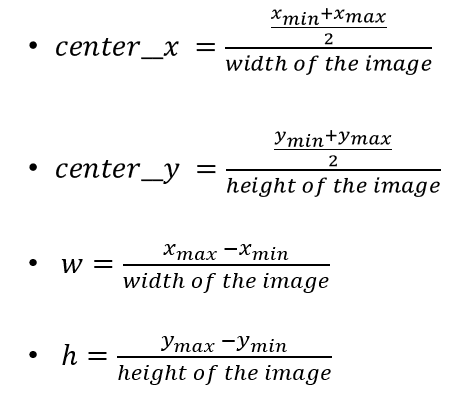

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15663 non-null  object
 1   width     15663 non-null  object
 2   height    15663 non-null  object
 3   name      15663 non-null  object
 4   xmin      15663 non-null  object
 5   xmax      15663 non-null  object
 6   ymin      15663 non-null  object
 7   ymax      15663 non-null  object
dtypes: object(8)
memory usage: 979.1+ KB


In [11]:
# type conversion
cols = ['width','height','xmin','xmax','ymin','ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15663 non-null  object
 1   width     15663 non-null  int32 
 2   height    15663 non-null  int32 
 3   name      15663 non-null  object
 4   xmin      15663 non-null  int32 
 5   xmax      15663 non-null  int32 
 6   ymin      15663 non-null  int32 
 7   ymax      15663 non-null  int32 
dtypes: int32(6), object(2)
memory usage: 612.0+ KB


In [13]:
# center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# w 
df['w'] = (df['xmax']-df['xmin'])/df['width']
# h 
df['h'] = (df['ymax']-df['ymin'])/df['height']
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,000001.jpg,1024,657,car,14,301,335,522,0.153809,0.652207,0.280273,0.284627
1,000001.jpg,1024,657,car,269,571,345,489,0.410156,0.634703,0.294922,0.219178
2,000001.jpg,1024,657,car,502,798,342,450,0.634766,0.602740,0.289062,0.164384
3,000001.jpg,1024,657,car,709,1009,333,438,0.838867,0.586758,0.292969,0.159817
4,000002.jpg,800,600,car,41,768,240,497,0.505625,0.614167,0.908750,0.428333


### split data into train and test

In [16]:
images = df['filename'].unique()
len(images)

5012

In [18]:
# 80% train and 20% test
img_df = pd.DataFrame(images,columns=['filename'])
img_train = tuple(img_df.sample(frac=0.8)['filename']) # shuffle and pick 80% of images
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename']) # take rest 20% images
img_train

('006536.jpg',
 '007454.jpg',
 '005541.jpg',
 '009200.jpg',
 '006306.jpg',
 '007336.jpg',
 '005576.jpg',
 '005159.jpg',
 '009004.jpg',
 '000964.jpg',
 '005850.jpg',
 '009738.jpg',
 '002460.jpg',
 '006725.jpg',
 '006981.jpg',
 '004304.jpg',
 '004722.jpg',
 '000001.jpg',
 '001498.jpg',
 '003292.jpg',
 '002129.jpg',
 '002086.jpg',
 '005338.jpg',
 '001713.jpg',
 '007655.jpg',
 '007449.jpg',
 '009780.jpg',
 '007702.jpg',
 '003416.jpg',
 '002559.jpg',
 '003714.jpg',
 '005990.jpg',
 '003860.jpg',
 '004455.jpg',
 '005507.jpg',
 '005413.jpg',
 '007383.jpg',
 '001614.jpg',
 '006652.jpg',
 '000344.jpg',
 '003876.jpg',
 '009461.jpg',
 '007854.jpg',
 '006698.jpg',
 '003161.jpg',
 '007460.jpg',
 '009573.jpg',
 '001288.jpg',
 '008241.jpg',
 '003213.jpg',
 '001493.jpg',
 '004229.jpg',
 '009481.jpg',
 '000338.jpg',
 '007571.jpg',
 '000608.jpg',
 '008263.jpg',
 '008885.jpg',
 '001002.jpg',
 '005439.jpg',
 '003798.jpg',
 '009410.jpg',
 '005729.jpg',
 '006597.jpg',
 '002454.jpg',
 '000408.jpg',
 '005135.j

In [19]:
len(img_train), len(img_test)

(4010, 1002)

In [26]:
train_df = df.query(f'filename in {img_train}')
test_df = df.query(f'filename in {img_test}')
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,000001.jpg,1024,657,car,14,301,335,522,0.153809,0.652207,0.280273,0.284627
1,000001.jpg,1024,657,car,269,571,345,489,0.410156,0.634703,0.294922,0.219178
2,000001.jpg,1024,657,car,502,798,342,450,0.634766,0.602740,0.289062,0.164384
3,000001.jpg,1024,657,car,709,1009,333,438,0.838867,0.586758,0.292969,0.159817
4,000002.jpg,800,600,car,41,768,240,497,0.505625,0.614167,0.908750,0.428333


In [27]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
17,000020.jpg,375,500,car,33,371,148,416,0.538667,0.564000,0.901333,0.536000
46,000036.jpg,332,500,dog,27,319,79,344,0.521084,0.423000,0.879518,0.530000
47,000039.jpg,500,375,tvmonitor,156,344,89,279,0.500000,0.490667,0.376000,0.506667
48,000041.jpg,500,333,tvmonitor,363,432,47,107,0.795000,0.231231,0.138000,0.180180
49,000041.jpg,500,333,person,216,307,92,302,0.523000,0.591592,0.182000,0.630631


### Assign id number to object names (as it is a text and we cannot train a yolo model with text)

In [28]:
# label encoding
def label_encoding(x):
    labels = {'person':0, 'car':1, 'chair':2, 'bottle':3, 'pottedplant':4, 'bird':5, 'dog':6,
       'sofa':7, 'bicycle':8, 'horse':9, 'boat':10, 'motorbike':11, 'cat':12, 'tvmonitor':13,
       'cow':14, 'sheep':15, 'aeroplane':16, 'train':17, 'diningtable':18, 'bus':19}
    return labels[x]

In [29]:
train_df['id'] = train_df['name'].apply(label_encoding)
test_df['id'] = test_df['name'].apply(label_encoding)

In [30]:
train_df.head(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,000001.jpg,1024,657,car,14,301,335,522,0.153809,0.652207,0.280273,0.284627,1
1,000001.jpg,1024,657,car,269,571,345,489,0.410156,0.634703,0.294922,0.219178,1
2,000001.jpg,1024,657,car,502,798,342,450,0.634766,0.602740,0.289062,0.164384,1
3,000001.jpg,1024,657,car,709,1009,333,438,0.838867,0.586758,0.292969,0.159817,1
4,000002.jpg,800,600,car,41,768,240,497,0.505625,0.614167,0.908750,0.428333,1
5,000002.jpg,800,600,car,533,722,236,299,0.784375,0.445833,0.236250,0.105000,1
6,000007.jpg,500,333,car,141,500,50,330,0.641000,0.570571,0.718000,0.840841,1
7,000009.jpg,500,375,horse,69,270,172,330,0.339000,0.669333,0.402000,0.421333,9
8,000009.jpg,500,375,person,150,229,141,284,0.379000,0.566667,0.158000,0.381333,0
9,000009.jpg,500,375,person,285,327,201,331,0.612000,0.709333,0.084000,0.346667,0


### Save Image and Labels in text

In [50]:
import os
from shutil import move

In [ ]:
train_folder = '1_datapreparation/data_images/train'
test_folder = '1_datapreparation/data_images/test'


os.mkdir(train_folder)
os.mkdir(test_folder)

In [52]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [53]:
groupby_obj_train.get_group('000009.jpg')

,filename,id,center_x,center_y,w,h
7,000009.jpg,9,0.339,0.669333,0.402,0.421333
8,000009.jpg,0,0.379,0.566667,0.158,0.381333
9,000009.jpg,0,0.612,0.709333,0.084,0.346667
10,000009.jpg,0,0.555,0.702667,0.078,0.349333


In [54]:
groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)

In [60]:
# save each image in train/test folder and repective labels in .txt
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join('1_datapreparation/data_images',filename) #source folder
    dst = os.path.join(folder_path,filename) #destination folder
    move(src,dst) # move image to the destination folder
    
    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)   

In [61]:
groupby_obj_train.groups.keys()

dict_keys(['000001.jpg', '000002.jpg', '000007.jpg', '000009.jpg', '000012.jpg', '000016.jpg', '000017.jpg', '000019.jpg', '000021.jpg', '000023.jpg', '000024.jpg', '000026.jpg', '000030.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000042.jpg', '000044.jpg', '000046.jpg', '000047.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000060.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000073.jpg', '000077.jpg', '000078.jpg', '000081.jpg', '000083.jpg', '000091.jpg', '000095.jpg', '000099.jpg', '000101.jpg', '000102.jpg', '000104.jpg', '000109.jpg', '000110.jpg', '000113.jpg', '000118.jpg', '000122.jpg', '000125.jpg', '000129.jpg', '000130.jpg', '000131.jpg', '000132.jpg', '000138.jpg', '000140.jpg', '000141.jpg', '000142.jpg', '000143.jpg', '000146.jpg', '000147.jpg', '000154.jpg', '000156.jpg', '000158.jpg', '000159.jpg', '000161.jpg', '000162.jpg', '000163.jpg', '000164.jpg', '000165.jpg', '000169.jpg', '000170.jpg', '000171.jpg', '000174.jpg', '000177.j

In [62]:
filename_series = pd.Series(groupby_obj_train.groups.keys())
filename_series

0       000001.jpg
1       000002.jpg
2       000007.jpg
3       000009.jpg
4       000012.jpg
           ...    
4005    009954.jpg
4006    009955.jpg
4007    009958.jpg
4008    009959.jpg
4009    009961.jpg
Length: 4010, dtype: object

In [63]:
filename_series = pd.Series(groupby_obj_train.groups.keys())
filename_series.apply(save_data,args=(train_folder,groupby_obj_train))

0       None
1       None
2       None
3       None
4       None
        ... 
4005    None
4006    None
4007    None
4008    None
4009    None
Length: 4010, dtype: object

In [64]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(test_folder,groupby_obj_test))

0       None
1       None
2       None
3       None
4       None
        ... 
997     None
998     None
999     None
1000    None
1001    None
Length: 1002, dtype: object